In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import sys
import random

In [2]:
#Просмотр входных данных на правильность
NKA = pd.read_csv("NKA2.csv", sep=',', header=0, index_col=0, encoding='cp1251', skipinitialspace=True, dtype=str)
NKA = NKA.fillna("")

#надеемся на то что начальное состояние находится в первой колонке

print("Данные недетерминированного конечного автомата")
print(NKA)

Данные недетерминированного конечного автомата
           S        NUM chetn
0      chetn  NUM/chetn      
1        NUM        NUM      
2  NUM/chetn  NUM/chetn      
3        NUM        NUM      
4  NUM/chetn  NUM/chetn      
5        NUM        NUM      
6  NUM/chetn  NUM/chetn      
7        NUM        NUM      
8  NUM/chetn  NUM/chetn      
9        NUM        NUM      


In [3]:
def GetNextTable(table):
    newTable = table.copy()
    
    #прогон по всем на поиск недетерминированности и создание столбца для его устранения
    for col, rowCell in table.iteritems():
        for row, cell in rowCell.items():
            if cell not in table and cell != "":
                itemToAssign = []
                for i, j in table.iterrows():
                    newMergeMove = ""
                    for k in cell.split("/"):
                        if newMergeMove == "":
                            newMergeMove = table.loc[i][k]
                        elif table.loc[i][k] != "":
                            newMergeMove = newMergeMove + "/" + table.loc[i][k]
                    itemToAssign.append(newMergeMove)
                newTable[cell] = itemToAssign 
    return newTable

In [4]:
def DeleteUnreachableNodes(table):
    newTable = table.copy()
    #удаляем все отвязанные столбцы
    disconnectedColumns = [col for col, rowCell in newTable.iteritems()]
    starterNode = disconnectedColumns[0]
    for col, rowCell in newTable.iteritems():
        for row, cell in rowCell.items():
            if cell in disconnectedColumns and cell != "":
                disconnectedColumns.remove(cell) 
                
    if starterNode in disconnectedColumns:
        disconnectedColumns.remove(starterNode)
    
    newTable = newTable.drop(columns = disconnectedColumns)
    return newTable

In [5]:
#main
newTable = GetNextTable(NKA)
oldTable = NKA

while not oldTable.equals(newTable):
    print()
    print(newTable)
    oldTable = newTable
    newTable = GetNextTable(newTable)

oldTable = NKA
    
while not oldTable.equals(newTable):
    print()
    print(newTable)
    oldTable = newTable
    newTable = DeleteUnreachableNodes(newTable)


           S        NUM chetn  NUM/chetn
0      chetn  NUM/chetn        NUM/chetn
1        NUM        NUM              NUM
2  NUM/chetn  NUM/chetn        NUM/chetn
3        NUM        NUM              NUM
4  NUM/chetn  NUM/chetn        NUM/chetn
5        NUM        NUM              NUM
6  NUM/chetn  NUM/chetn        NUM/chetn
7        NUM        NUM              NUM
8  NUM/chetn  NUM/chetn        NUM/chetn
9        NUM        NUM              NUM

           S        NUM chetn  NUM/chetn
0      chetn  NUM/chetn        NUM/chetn
1        NUM        NUM              NUM
2  NUM/chetn  NUM/chetn        NUM/chetn
3        NUM        NUM              NUM
4  NUM/chetn  NUM/chetn        NUM/chetn
5        NUM        NUM              NUM
6  NUM/chetn  NUM/chetn        NUM/chetn
7        NUM        NUM              NUM
8  NUM/chetn  NUM/chetn        NUM/chetn
9        NUM        NUM              NUM


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


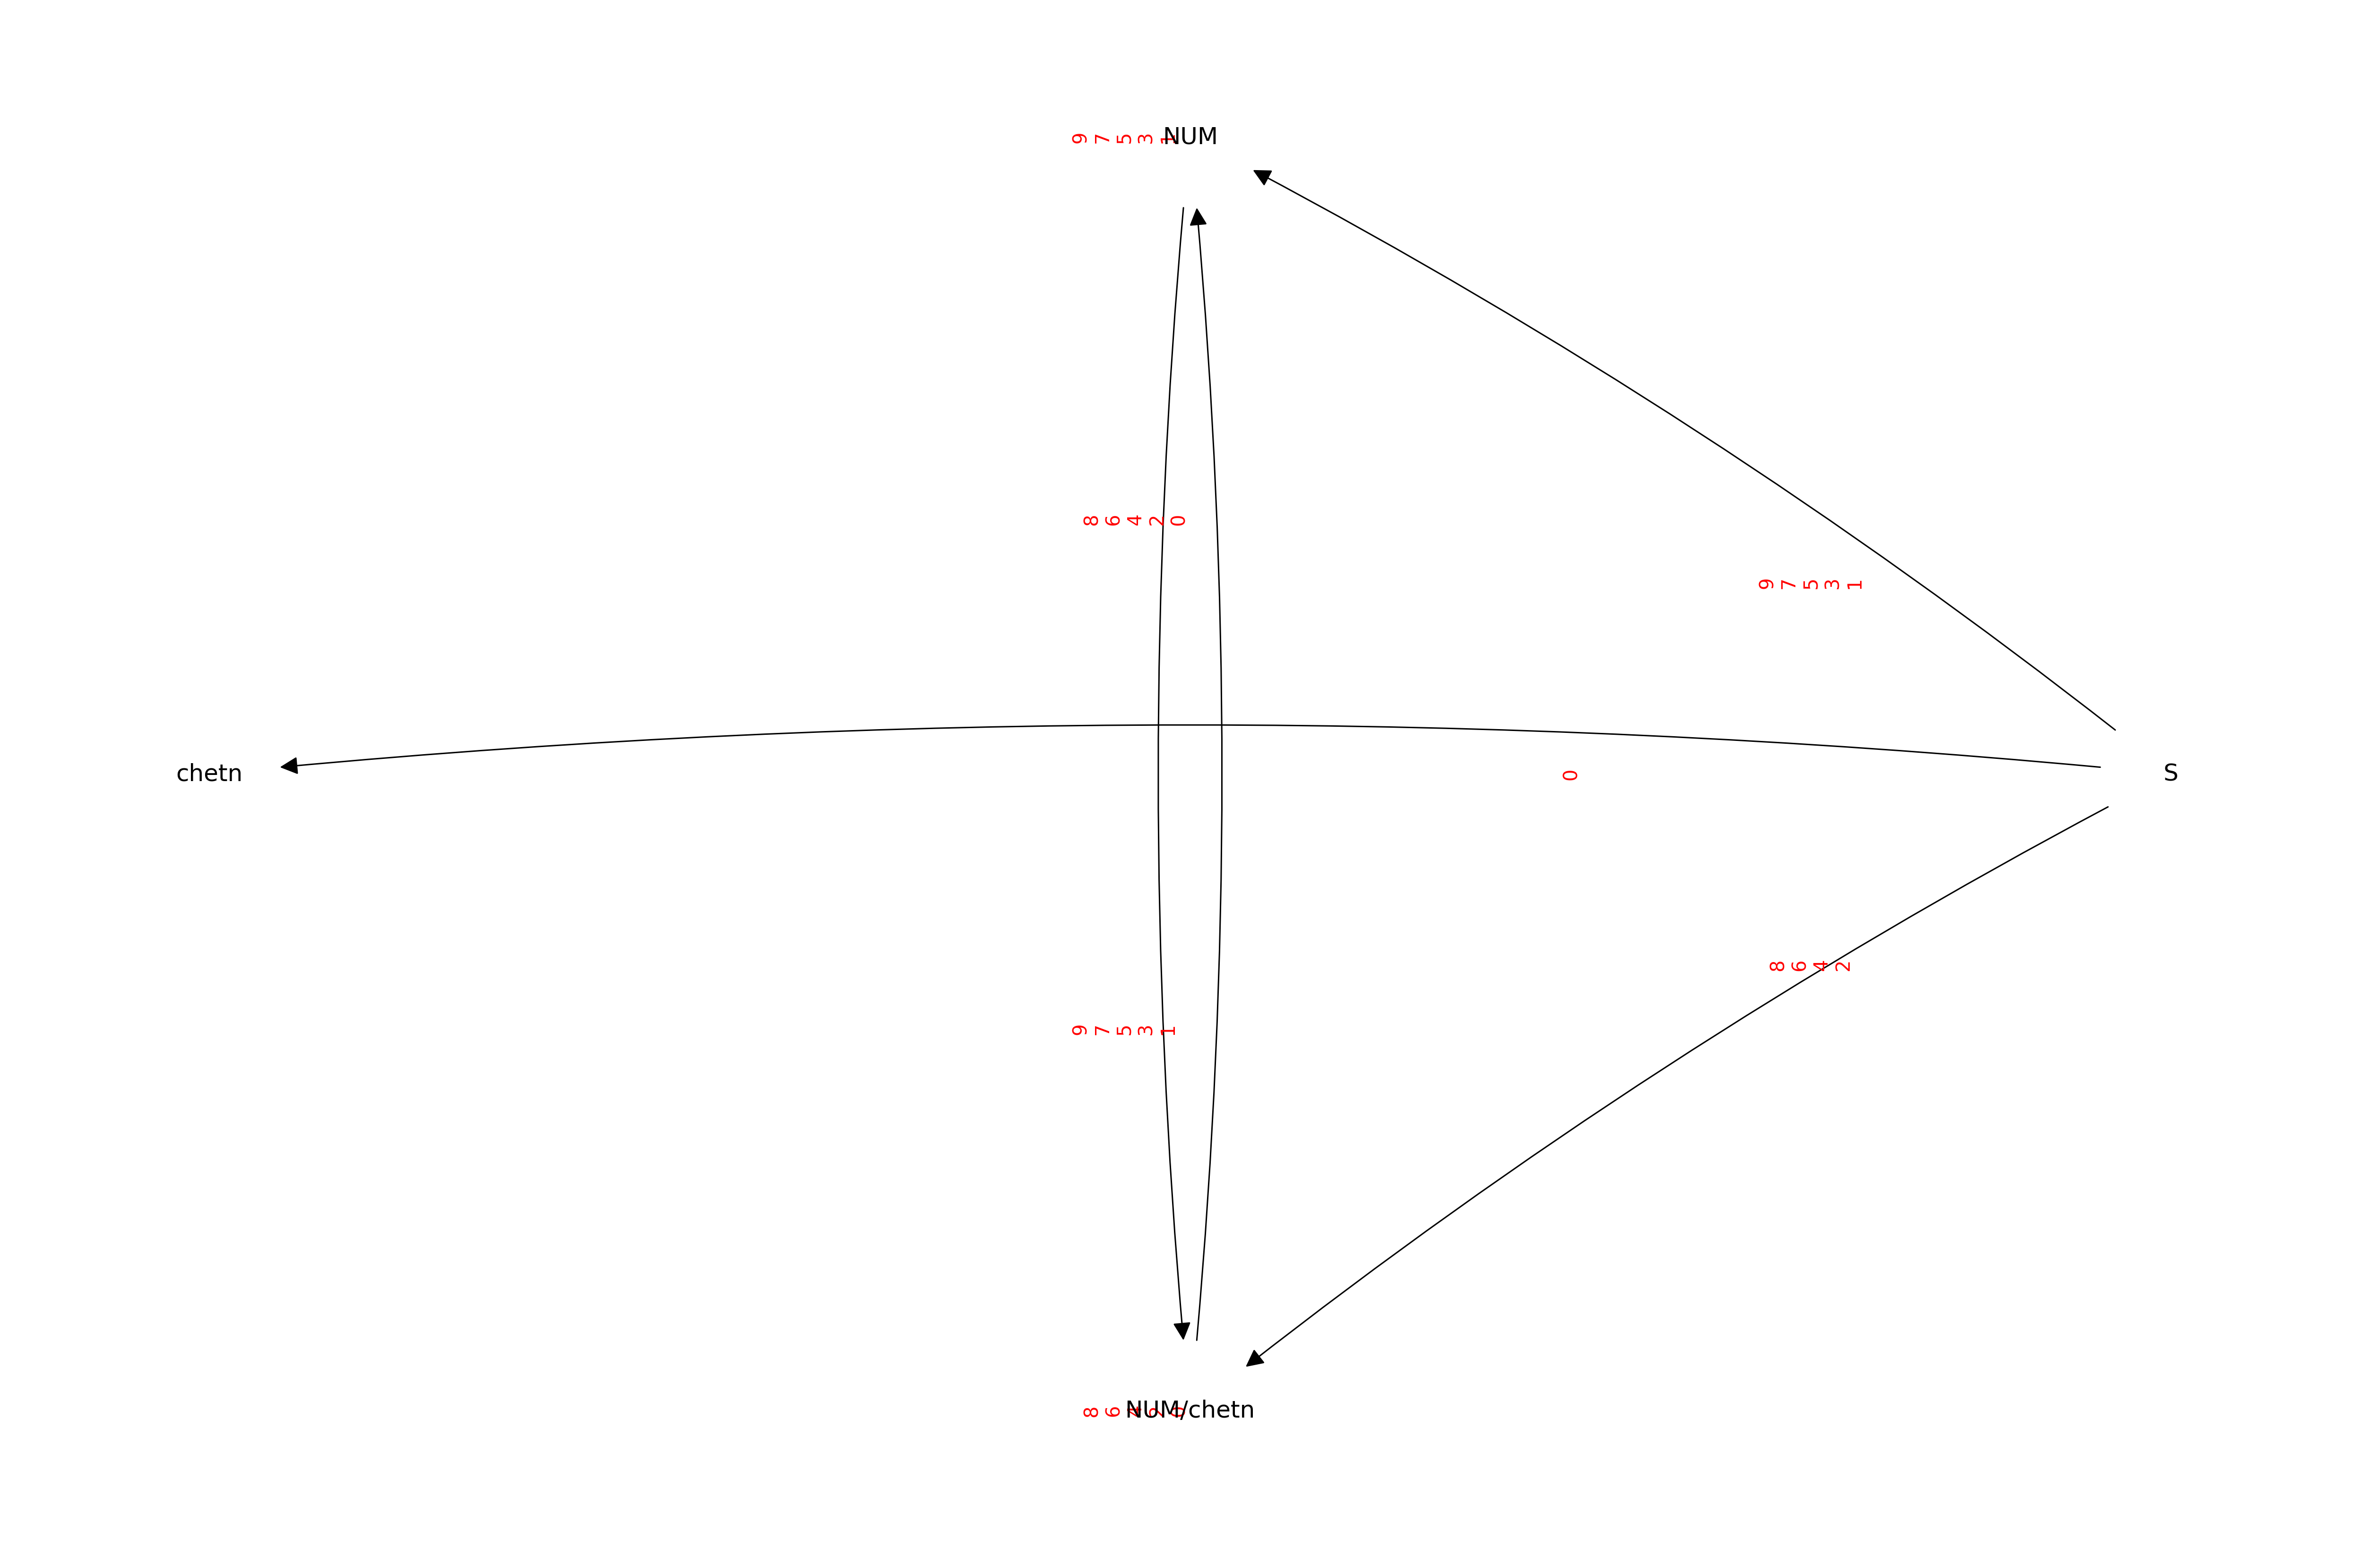

In [6]:
#визуализация Детерминированного конечного автомата
plt.figure(figsize=(90, 60))
G = nx.DiGraph()


for i, j in newTable.iteritems():
    G.add_node(i)
    
for i, j in newTable.iteritems():
    for k, l in j.items():
        if l != "":
            G.add_edge(i, l)

pos = nx.circular_layout(G)
    
marginItems = []
for i, j in newTable.iterrows():
    marginItems.append(i)
    
print(marginItems)
    
for i, j in newTable.iteritems():
    for k, l in j.items():
        if l != "":
            text = nx.draw_networkx_edge_labels(G, pos, label_pos=0.7+marginItems.index(k)*0, bbox=dict(alpha = 0), edge_labels = {(i, l): str(k)+"\n"*(marginItems.index(k)+1)}, font_color='red', font_size=40, verticalalignment="center")
            
            for _,t in text.items():
                t.set_rotation('vertical')
                
nx.draw_networkx_nodes(G, pos, node_color="#00000000")
## edges
nx.draw_networkx_edges(G, pos, width=3, arrowsize=80, min_source_margin=150, min_target_margin=150, connectionstyle="arc3, rad=0.05")

nx.draw_networkx_labels(G, pos, font_size=50, font_family='sans-serif')


    
plt.axis('off')

plt.show()